**Employee Attrition rate Analysis and Prediction of Employee likely to exit from organization using historial data and Machine learning Alogorithms**


Tasks to perform
1.   Exploratory Data Analysis
2.   Preparation of dataset
3.   scaling of dataset
4.   spliting of dataset into train and test
5.   oversampling of minority data
6.   training and testing on different classifiers
7.   comparision of prediction scores
8.   plotting the results.



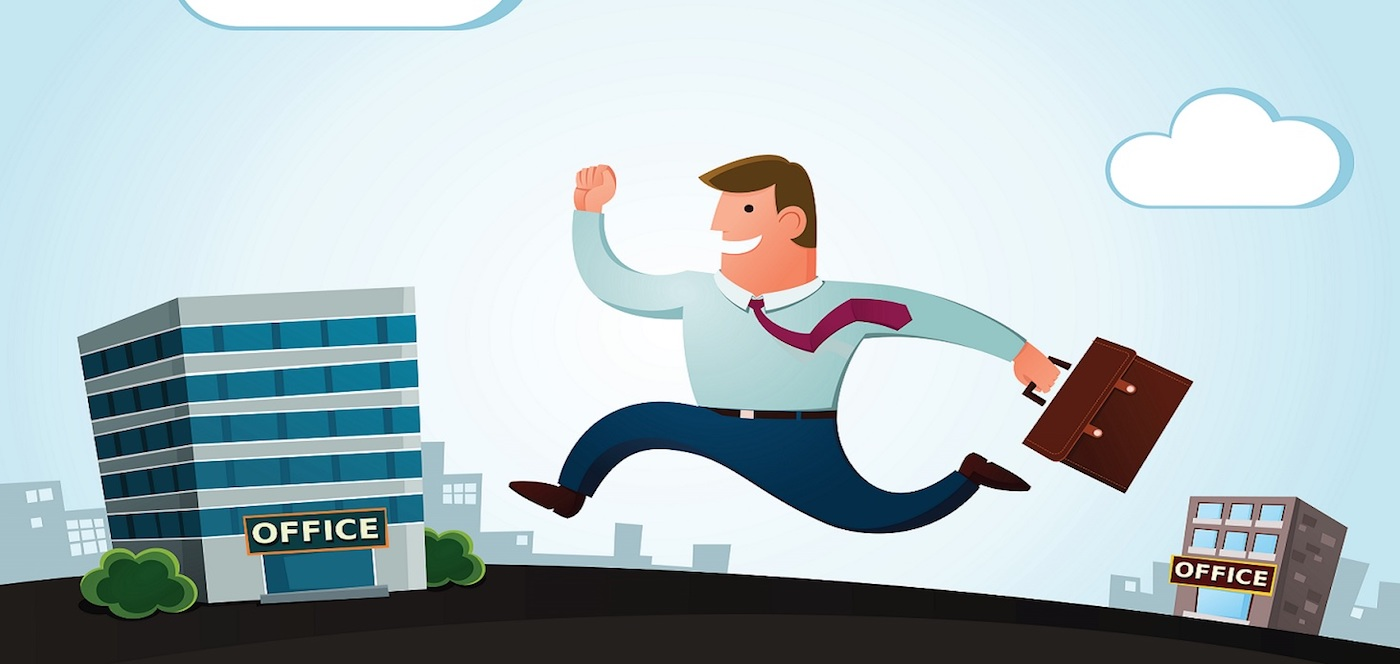

In [1]:
from IPython.display import Image
Image("https://www.reachext.co.jp/wp-content/uploads/2020/11/job-hopping-and-employee-attrition.jpg")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler

**Using IBM Employee Attrition dataframe from Kaggle**

In [3]:
Employeedf = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

**EXPLORATORY DATA ANALYSIS**

In [4]:
Employeedf

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [5]:
print("shape of the dataset is",Employeedf.shape)

shape of the dataset is (1470, 35)


In [6]:
print("columns present in the dataset are: \n ",Employeedf.columns)

columns present in the dataset are: 
  Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [7]:
print("datatypes of the categories in dataset: \n",Employeedf.dtypes,"\n")

datatypes of the categories in dataset: 
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLe

**Null Analysis**

In [8]:
Employeedf.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
# Description of the dataset
Employeedf.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


No Missing values found in the dataset

**Categorical Data Analysis**

In [10]:
for col in Employeedf.columns:
  if Employeedf[col].dtype == np.int_:
    continue
  else:
    print("* ",col)
    print("unique values:\n",Employeedf[col].unique())
    print("unique values:\n",Employeedf[col].value_counts())
    print("\n--------------------------")

*  Attrition
unique values:
 ['Yes' 'No']
unique values:
 No     1233
Yes     237
Name: Attrition, dtype: int64

--------------------------
*  BusinessTravel
unique values:
 ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
unique values:
 Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

--------------------------
*  Department
unique values:
 ['Sales' 'Research & Development' 'Human Resources']
unique values:
 Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

--------------------------
*  EducationField
unique values:
 ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
unique values:
 Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

--------------------------
*  Gender
unique values:
 [

**inferred information**
- Over18 column is having only one value and hence can be dropped
- Attrition column (Target) is having "No" count 1233 and "Yes" count 237 (Imbalanced dataset)

**Distribution Analysis of the features**

* Age Distribution

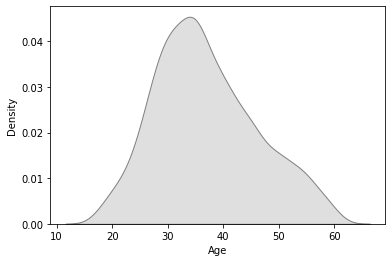

In [11]:
sns.kdeplot(Employeedf["Age"],shade="true",color="grey")

Most of the employees falls under the range of [30,40]

In [12]:
Employeedf.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

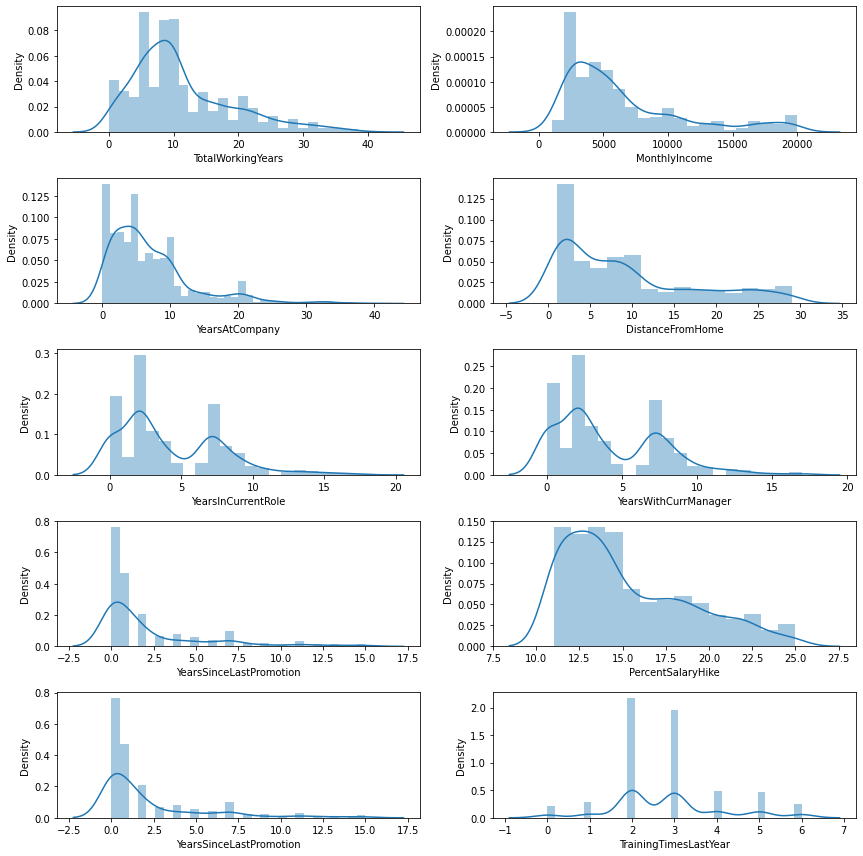

In [13]:
fig,ax = plt.subplots(5,2,figsize=(12,12))
sns.distplot(Employeedf['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(Employeedf['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(Employeedf['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(Employeedf['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(Employeedf['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(Employeedf['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(Employeedf['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(Employeedf['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(Employeedf['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(Employeedf['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()

**Attrition count**

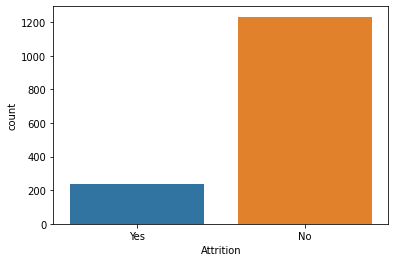

In [14]:
sns.countplot(Employeedf['Attrition'])

Highly imbalanced dataset

In [15]:
# To plot the count with respect to attrition 
def wrt_Attrition(label):
  plt.figure(figsize=(20,6))
  sns.countplot(data=Employeedf[Employeedf['Attrition']=='Yes'],x=label)
  plt.show()
  
  print(pd.crosstab(columns=Employeedf['Attrition'],index=Employeedf[label], normalize=True, margins=True))

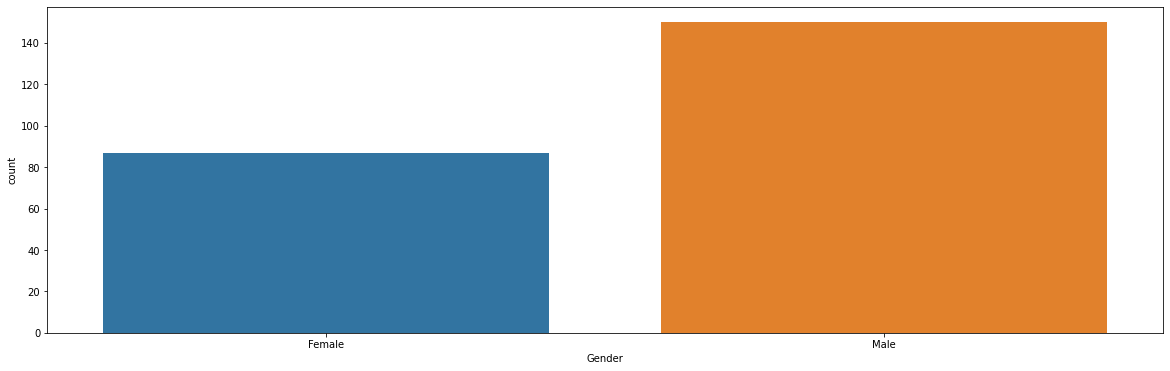

Attrition        No       Yes  All
Gender                            
Female     0.340816  0.059184  0.4
Male       0.497959  0.102041  0.6
All        0.838776  0.161224  1.0


In [16]:
# Gender wrt attrition
wrt_Attrition('Gender')

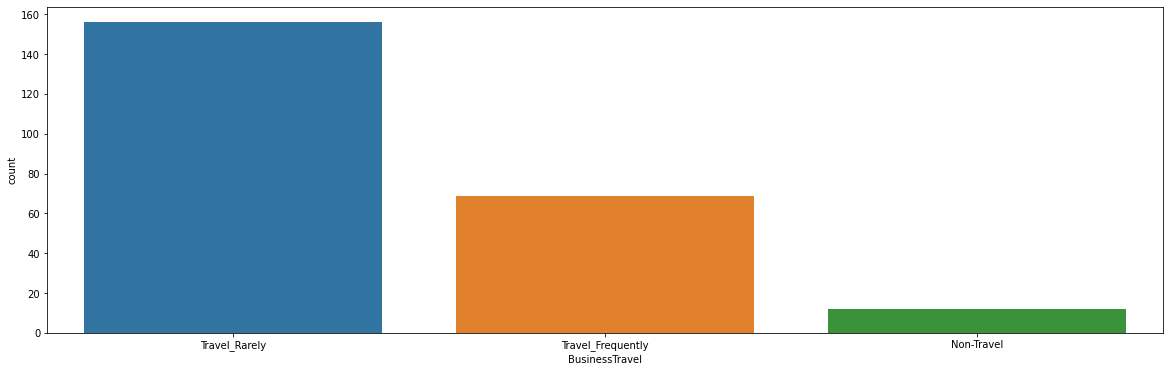

Attrition                No       Yes       All
BusinessTravel                                 
Non-Travel         0.093878  0.008163  0.102041
Travel_Frequently  0.141497  0.046939  0.188435
Travel_Rarely      0.603401  0.106122  0.709524
All                0.838776  0.161224  1.000000


In [17]:
# BusinessTravel wrt attrition
wrt_Attrition('BusinessTravel')

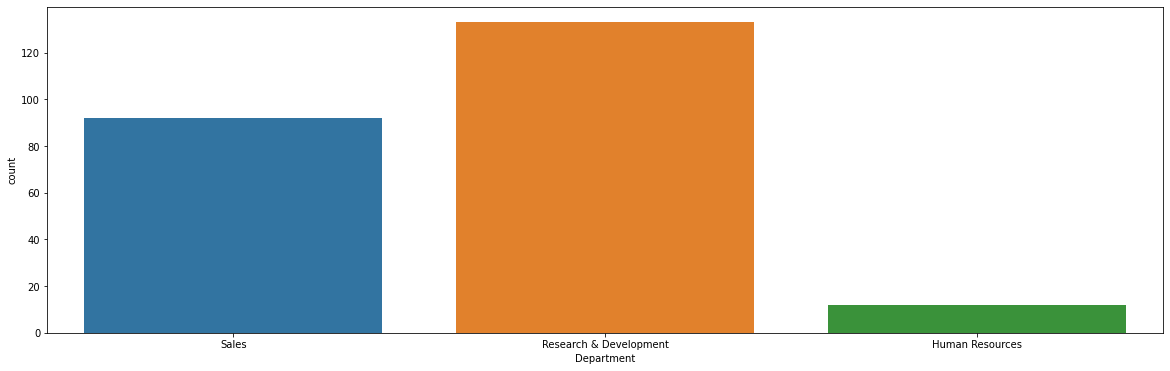

Attrition                     No       Yes       All
Department                                          
Human Resources         0.034694  0.008163  0.042857
Research & Development  0.563265  0.090476  0.653741
Sales                   0.240816  0.062585  0.303401
All                     0.838776  0.161224  1.000000


In [18]:
# Department wrt attrition
wrt_Attrition('Department')

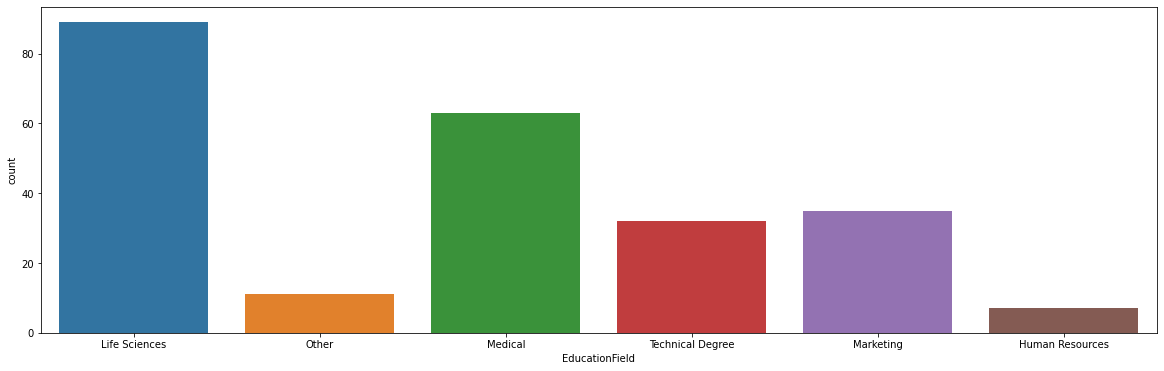

Attrition               No       Yes       All
EducationField                                
Human Resources   0.013605  0.004762  0.018367
Life Sciences     0.351701  0.060544  0.412245
Marketing         0.084354  0.023810  0.108163
Medical           0.272789  0.042857  0.315646
Other             0.048299  0.007483  0.055782
Technical Degree  0.068027  0.021769  0.089796
All               0.838776  0.161224  1.000000


In [19]:
# EducationField wrt attrition
wrt_Attrition('EducationField')

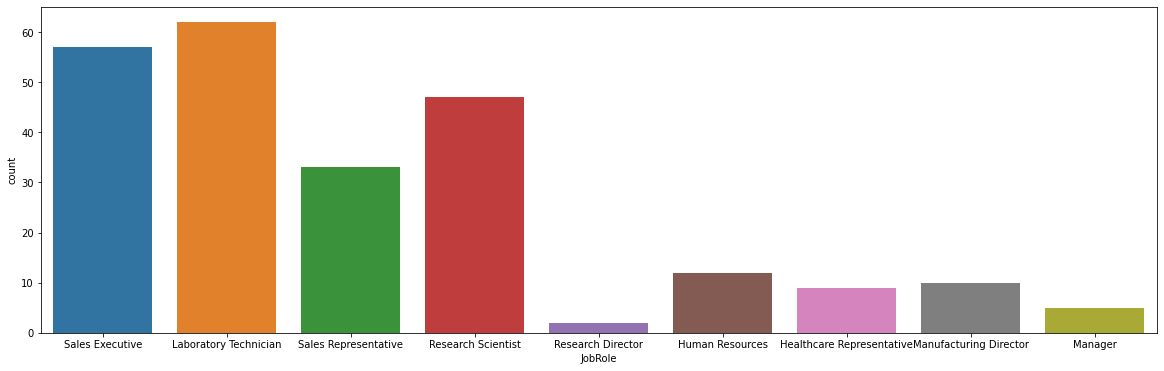

Attrition                        No       Yes       All
JobRole                                                
Healthcare Representative  0.082993  0.006122  0.089116
Human Resources            0.027211  0.008163  0.035374
Laboratory Technician      0.134014  0.042177  0.176190
Manager                    0.065986  0.003401  0.069388
Manufacturing Director     0.091837  0.006803  0.098639
Research Director          0.053061  0.001361  0.054422
Research Scientist         0.166667  0.031973  0.198639
Sales Executive            0.182993  0.038776  0.221769
Sales Representative       0.034014  0.022449  0.056463
All                        0.838776  0.161224  1.000000


In [20]:
# JobRole wrt attrition
wrt_Attrition('JobRole')

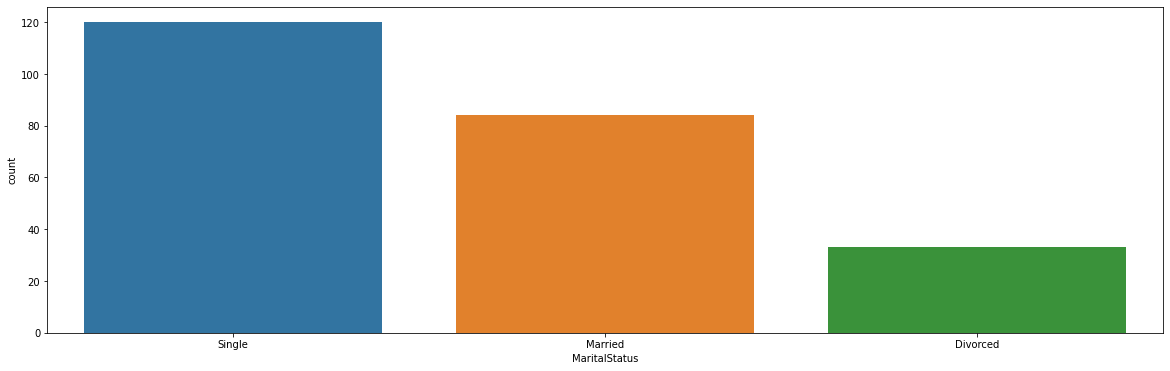

Attrition            No       Yes       All
MaritalStatus                              
Divorced       0.200000  0.022449  0.222449
Married        0.400680  0.057143  0.457823
Single         0.238095  0.081633  0.319728
All            0.838776  0.161224  1.000000


In [21]:
# MaritalStatus wrt attrition
wrt_Attrition('MaritalStatus')

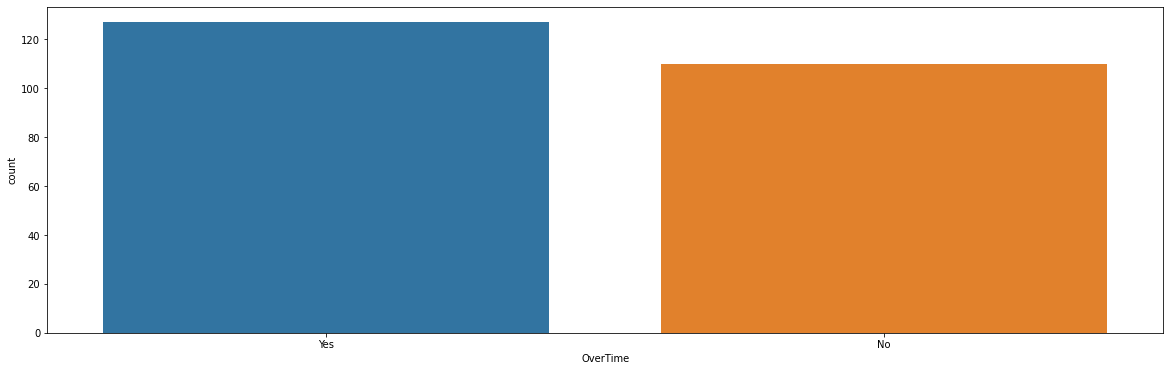

Attrition        No       Yes       All
OverTime                               
No         0.642177  0.074830  0.717007
Yes        0.196599  0.086395  0.282993
All        0.838776  0.161224  1.000000


In [22]:
# OverTime wrt attrition
wrt_Attrition('OverTime')

[3 4]


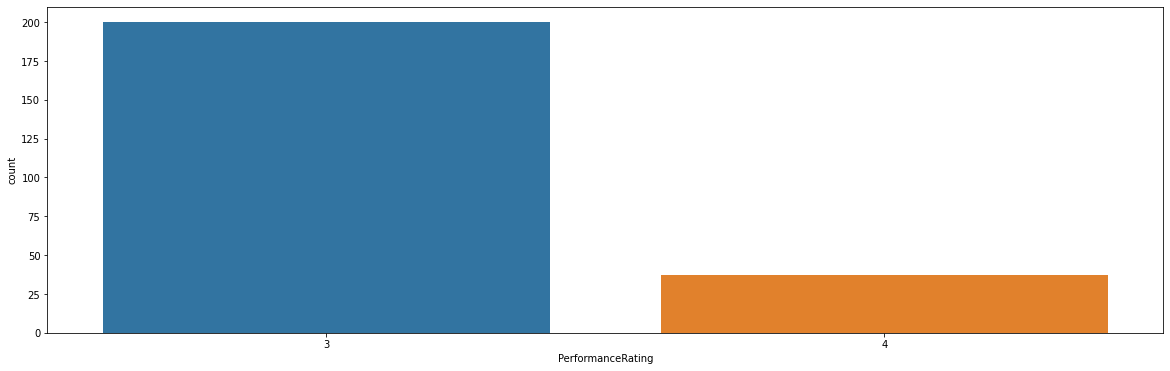

Attrition                No       Yes       All
PerformanceRating                              
3                  0.710204  0.136054  0.846259
4                  0.128571  0.025170  0.153741
All                0.838776  0.161224  1.000000


In [23]:
# PerformanceRating wrt attrition
print(Employeedf['PerformanceRating'].unique())
wrt_Attrition('PerformanceRating')

[8 1 6 9 0 4 5 2 7 3]


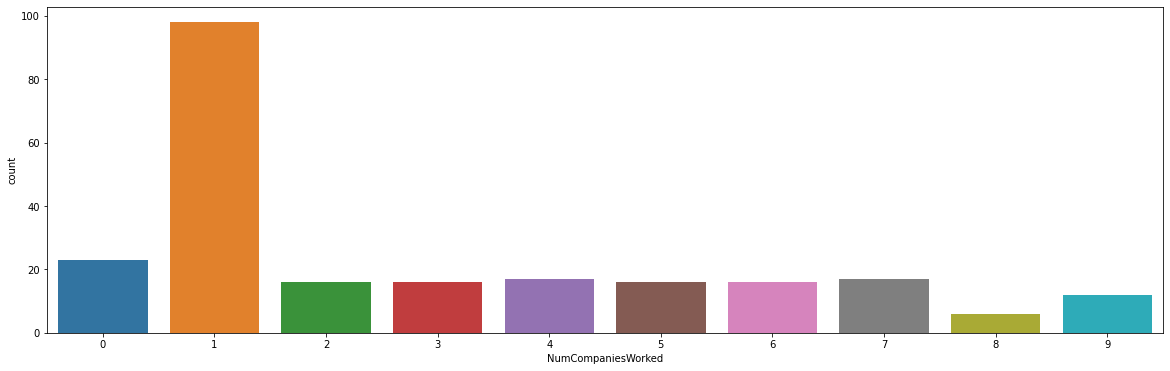

Attrition                 No       Yes       All
NumCompaniesWorked                              
0                   0.118367  0.015646  0.134014
1                   0.287755  0.066667  0.354422
2                   0.088435  0.010884  0.099320
3                   0.097279  0.010884  0.108163
4                   0.082993  0.011565  0.094558
5                   0.031973  0.010884  0.042857
6                   0.036735  0.010884  0.047619
7                   0.038776  0.011565  0.050340
8                   0.029252  0.004082  0.033333
9                   0.027211  0.008163  0.035374
All                 0.838776  0.161224  1.000000


In [24]:
# NumCompaniesWorked wrt attrition
print(Employeedf['NumCompaniesWorked'].unique())
wrt_Attrition('NumCompaniesWorked')

[0 1 3 2]


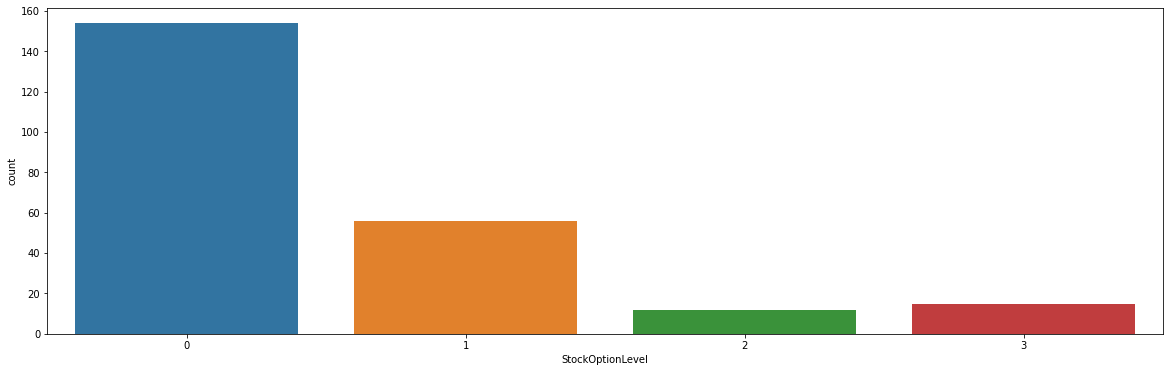

Attrition               No       Yes       All
StockOptionLevel                              
0                 0.324490  0.104762  0.429252
1                 0.367347  0.038095  0.405442
2                 0.099320  0.008163  0.107483
3                 0.047619  0.010204  0.057823
All               0.838776  0.161224  1.000000


In [25]:
# StockOptionLevel wrt attrition
print(Employeedf['StockOptionLevel'].unique())
wrt_Attrition('StockOptionLevel')

[0 3 2 5 1 4 6]


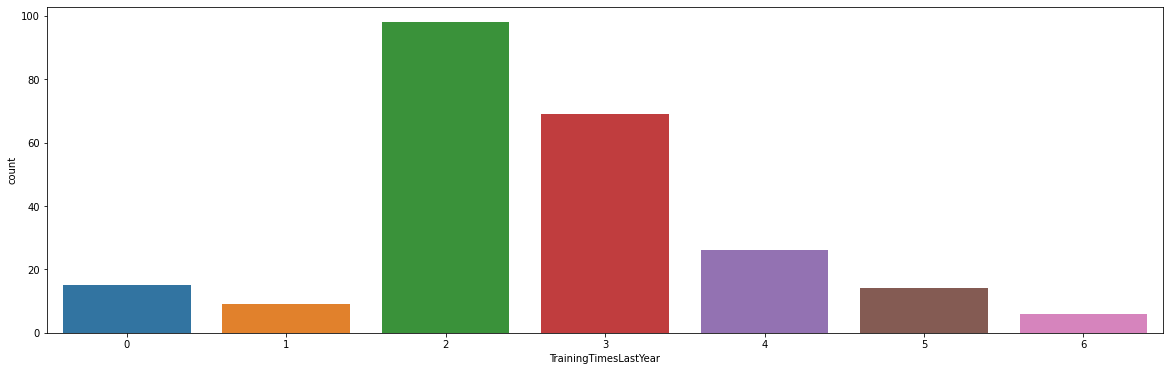

Attrition                    No       Yes       All
TrainingTimesLastYear                              
0                      0.026531  0.010204  0.036735
1                      0.042177  0.006122  0.048299
2                      0.305442  0.066667  0.372109
3                      0.287075  0.046939  0.334014
4                      0.065986  0.017687  0.083673
5                      0.071429  0.009524  0.080952
6                      0.040136  0.004082  0.044218
All                    0.838776  0.161224  1.000000


In [26]:

# TrainingTimesLastYear wrt attrition
print(Employeedf['TrainingTimesLastYear'].unique())
wrt_Attrition('TrainingTimesLastYear')

**Correlation Analysis**

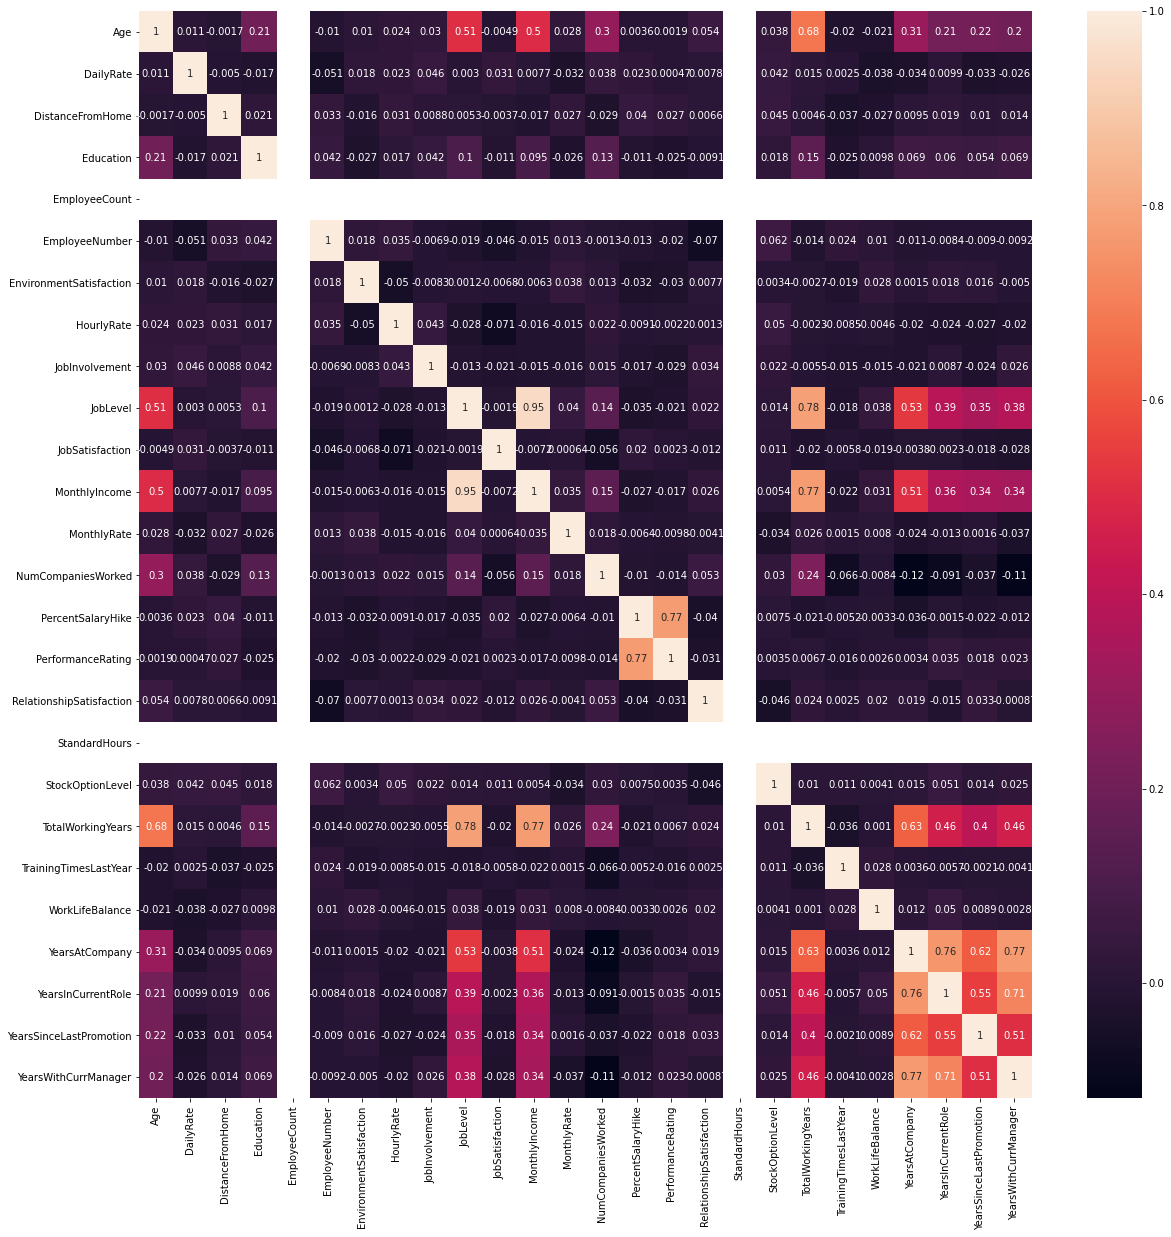

In [27]:
# To check the degree of influence of feature on other features
cm = Employeedf.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True)

**PREPARATION OF DATASET**

In [28]:
# Dropping the irrelevant columns which doesnot contribute much to the decision (As per the above Feature analysis)
Employeedf.drop(['BusinessTravel','DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate'
          ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

In [29]:
# Finding the Categorical Features
Employeedf.dtypes
cat_Employee = []
for col in Employeedf.columns:
  if Employeedf[col].dtypes == 'object':
    cat_Employee.append(col)

In [30]:
print(cat_Employee)
print(Employeedf.shape)

['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
(1470, 24)


In [31]:
# Encoding the categorical features

def le_transform(col):
  le = LabelEncoder()
  Employeedf[col] = le.fit_transform(Employeedf[col])
  print("Category ",col, ":",le.classes_)

In [32]:
for col in cat_Employee:
  le_transform(col)

Category  Attrition : ['No' 'Yes']
Category  Department : ['Human Resources' 'Research & Development' 'Sales']
Category  EducationField : ['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
Category  Gender : ['Female' 'Male']
Category  JobRole : ['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
Category  MaritalStatus : ['Divorced' 'Married' 'Single']
Category  OverTime : ['No' 'Yes']


In [33]:
Employeedf

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1,2,1,2,0,3,2,7,4,2,5993,1,11,3,1,8,1,6,4,0,5
1,49,0,1,8,1,1,3,1,2,2,6,2,1,5130,0,23,4,4,10,3,10,7,1,7
2,37,1,1,2,2,4,4,1,2,1,2,3,2,2090,1,15,3,2,7,3,0,0,0,0
3,33,0,1,3,4,1,4,0,3,1,6,3,1,2909,1,11,3,3,8,3,8,7,3,0
4,27,0,1,2,1,3,1,1,3,1,2,2,1,3468,0,12,3,4,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,23,2,3,3,1,4,2,2,4,1,2571,0,17,3,3,17,3,5,2,0,3
1466,39,0,1,6,1,3,4,1,2,3,0,1,1,9991,0,15,3,1,9,3,7,7,1,7
1467,27,0,1,4,3,1,2,1,4,2,4,2,1,6142,1,20,4,2,6,3,6,2,0,3
1468,49,0,2,2,3,3,4,1,2,2,7,2,1,5390,0,14,3,4,17,2,9,6,0,8


**Scaling and Splitting**

In [34]:
scaler = StandardScaler()
X = scaler.fit_transform(Employeedf.drop(['Attrition'],axis=1))
Y = Employeedf['Attrition'].to_numpy()

In [35]:
# Splitting of dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [36]:
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE

over_sampler = SMOTE(random_state=101)
osXtrain, osYtrain = over_sampler.fit_sample(x_train,y_train)

0.4.3


In [37]:
osXtrain.shape, osYtrain.shape 

((1724, 23), (1724,))

**Machine Model Training and appraisal**

In [38]:
# Import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Import the Appraisal metrics
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV

In [39]:
comparision_matrix = []
def compare_classifier(clf,label):
  clf.fit(osXtrain,osYtrain)
  ypred = clf.predict(x_test)
  comparision_matrix.append([label, 
                          sklearn.metrics.accuracy_score(y_test,ypred),
                          sklearn.metrics.recall_score(y_test,ypred),
                          sklearn.metrics.precision_score(y_test,ypred),
                          sklearn.metrics.f1_score(y_test,ypred),
                          sklearn.metrics.roc_auc_score(y_test,ypred)
                           ])


Logistic Regression

In [40]:
compare_classifier(LogisticRegression(),'Logistic Regression') 

LinearSV

In [41]:
compare_classifier(LinearSVC(),'LinearSV') 

SVC

In [42]:
compare_classifier(SVC(),'SVC')

KNeighborsClassifier

In [43]:
compare_classifier(KNeighborsClassifier(),'KNeighborsClassifier')

RandomForestClassifier

In [44]:
compare_classifier(RandomForestClassifier(),'RandomForestClassifier')

DecisionTreeClassifier

In [45]:
compare_classifier(DecisionTreeClassifier(),'DecisionTreeClassifier')

GradientBoostingClassifier

In [46]:
compare_classifier(GradientBoostingClassifier(),'GradientBoostingClassifier')

GaussianNB

In [47]:
compare_classifier(GaussianNB(),'GaussianNB')

In [48]:
comparision_matrix = pd.DataFrame(comparision_matrix)
comparision_matrix.columns = ['classifier','accuracy','recall','precision','f1 score','roc auc score']
comparision_matrix

,classifier,accuracy,recall,precision,f1 score,roc auc score
0,Logistic Regression,0.746032,0.657143,0.343284,0.450980,0.709973
1,LinearSV,0.741497,0.657143,0.338235,0.446602,0.707278
2,SVC,0.811791,0.428571,0.410959,0.419580,0.656334
3,KNeighborsClassifier,0.698413,0.600000,0.285714,0.387097,0.658491
4,RandomForestClassifier,0.866213,0.357143,0.641026,0.458716,0.659704
5,DecisionTreeClassifier,0.768707,0.457143,0.333333,0.385542,0.642318
6,GradientBoostingClassifier,0.861678,0.457143,0.581818,0.512000,0.697574
7,GaussianNB,0.546485,0.728571,0.219828,0.337748,0.620350


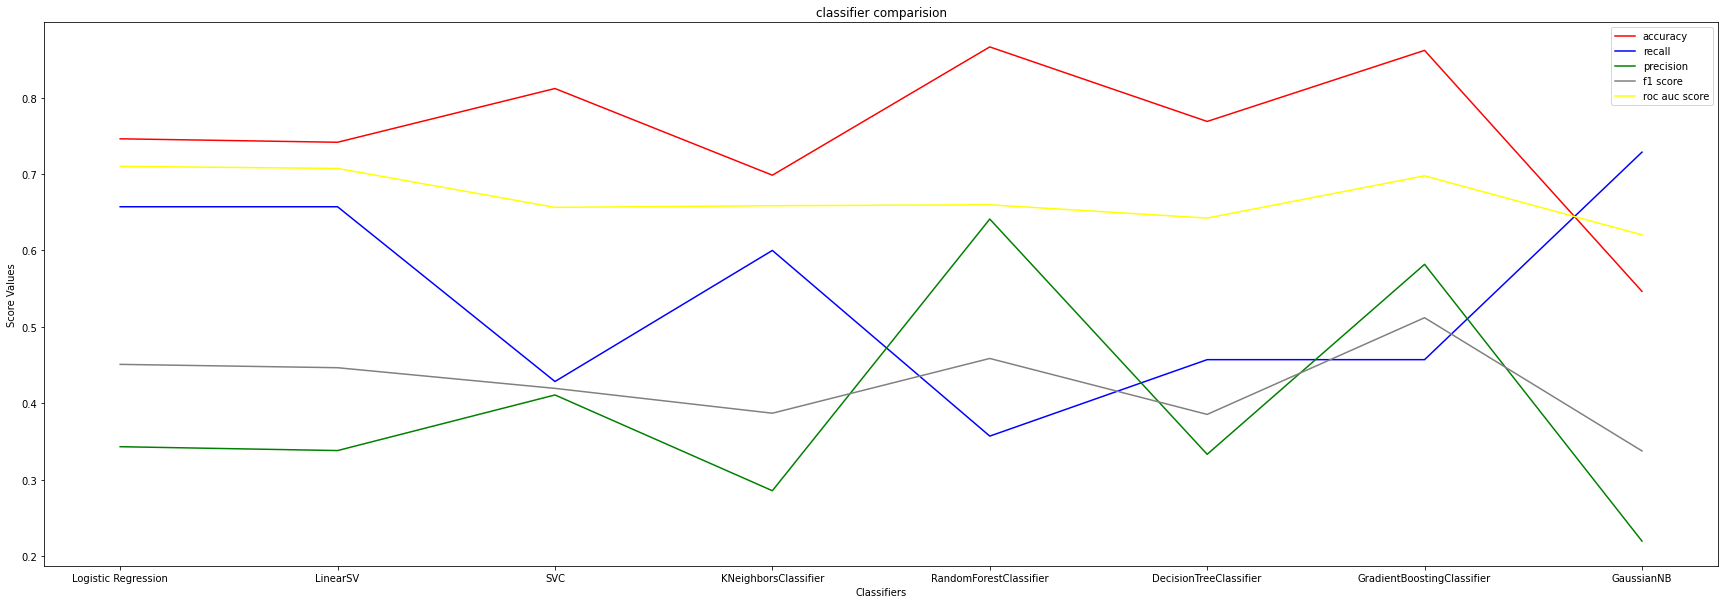

In [49]:
plt.figure(figsize=(30,10))
plt.plot(comparision_matrix['classifier'],comparision_matrix['accuracy'], color = 'red')
plt.plot(comparision_matrix['classifier'],comparision_matrix['recall'], color = 'blue')
plt.plot(comparision_matrix['classifier'],comparision_matrix['precision'], color = 'green')
plt.plot(comparision_matrix['classifier'],comparision_matrix['f1 score'], color = 'grey')
plt.plot(comparision_matrix['classifier'],comparision_matrix['roc auc score'], color = 'yellow')
plt.legend(comparision_matrix.columns[1:],loc='upper right')
plt.ylabel('Score Values')
plt.xlabel('Classifiers')
plt.title("classifier comparision")
plt.show()